# Neural Network Models

import statements:

In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.neural_network import MLPClassifier
from ds_charts import plot_evaluation_results, multiple_line_chart, horizontal_bar_chart, HEIGHT
import sklearn.metrics as metrics

file_tag = 'NYC_collisions'
target = 'PERSON_INJURY'

ModuleNotFoundError: ignored

## Dummified data with scaling

get dataframes:

In [4]:
train: DataFrame = read_csv('data/train_sets/with_scaling.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv('data/test_sets/with_scaling.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

train models:

<Figure size 600x450 with 0 Axes>

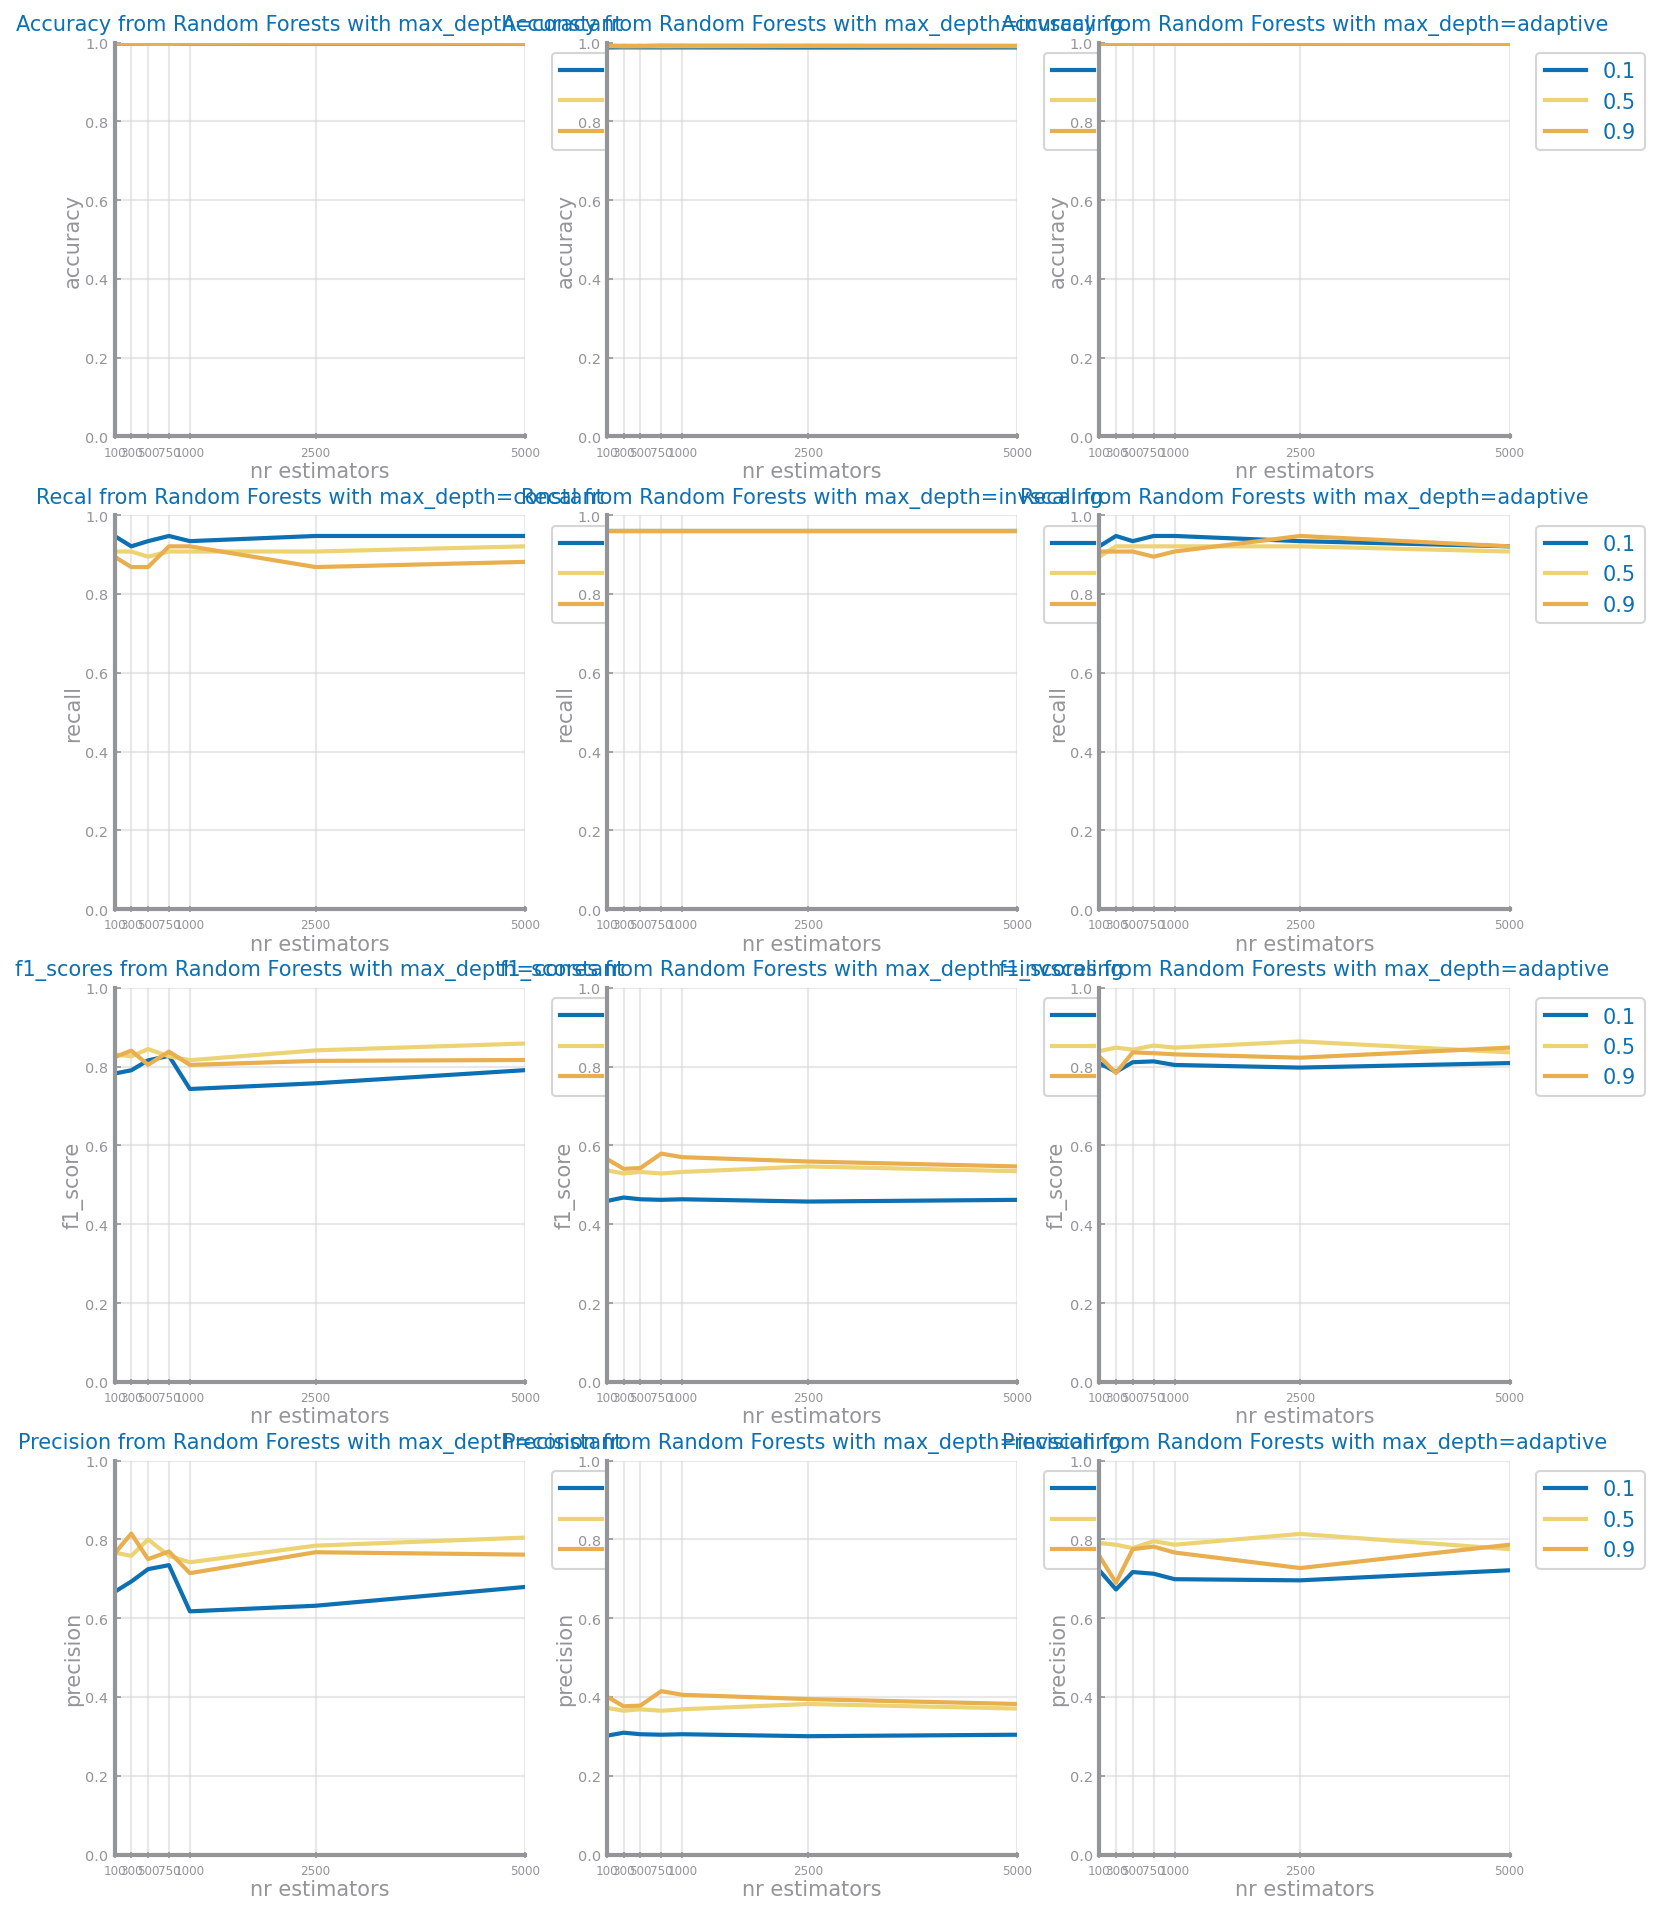

TypeError: ignored

In [5]:
lr_type = ['constant', 'invscaling', 'adaptive']
max_iter = [100, 300, 500, 750, 1000, 2500, 5000]
learning_rate = [.1, .5, .9]
best = ('', 0, 0)
last_best = 0
best_model = None

cols = len(lr_type)
figure()
fig, axs = subplots(4, cols, figsize=(cols*HEIGHT, 4*HEIGHT), squeeze=False)
for k in range(len(lr_type)):
    d = lr_type[k]

    acc_values = {}
    recall_values = {}
    f1_values = {}
    precision_values = {}

    for lr in learning_rate:
        recall = []
        f1_score = []
        accuracy = []
        precision = []
        for n in max_iter:
            mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate=d,
                          learning_rate_init=lr, max_iter=n, verbose=False)
            mlp.fit(trnX, trnY)
            prdY = mlp.predict(tstX)

            accuracy.append(metrics.accuracy_score(tstY, prdY))
            recall.append(metrics.recall_score(tstY, prdY, pos_label='Killed'))
            f1_score.append(metrics.f1_score(tstY, prdY, pos_label="Killed"))
            precision.append(metrics.precision_score(tstY, prdY, pos_label="Killed"))

            if accuracy[-1] > last_best:
                best = (d, lr, n)
                last_best = accuracy[-1]
                best_model = mlp
                
        precision_values[lr] = precision
        acc_values[lr] = accuracy
        recall_values[lr] = recall
        f1_values[lr] = f1_score

    multiple_line_chart(max_iter, acc_values, ax=axs[0, k], title=f'Accuracy from Random Forests with max_depth={d}',
                           xlabel='nr estimators', ylabel='accuracy', percentage=True)
    multiple_line_chart(max_iter, recall_values, ax=axs[1, k], title=f'Recal from Random Forests with max_depth={d}',
                           xlabel='nr estimators', ylabel='recall', percentage=True)
    multiple_line_chart(max_iter, f1_values, ax=axs[2, k], title=f'f1_scores from Random Forests with max_depth={d}',
                           xlabel='nr estimators', ylabel='f1_score', percentage=True)
    multiple_line_chart(max_iter, precision_values, ax=axs[3, k], title=f'Precision from Random Forests with max_depth={d}',
                           xlabel='nr estimators', ylabel='precision', percentage=True)

savefig(f'images/{file_tag}_scl_mlp_study.png')
show()
print('Best results with depth=%d, %1.2f features and %d estimators, with accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

In [8]:
print(f'Best results with lr_type={best[0]}, learning rate={best[1]} and {best[2]} max iter, with accuracy={last_best}')

Best results with lr_type=adaptive, learning rate=0.5 and 2500 max iter, with accuracy=0.9983942777899424


plot study for the best model:

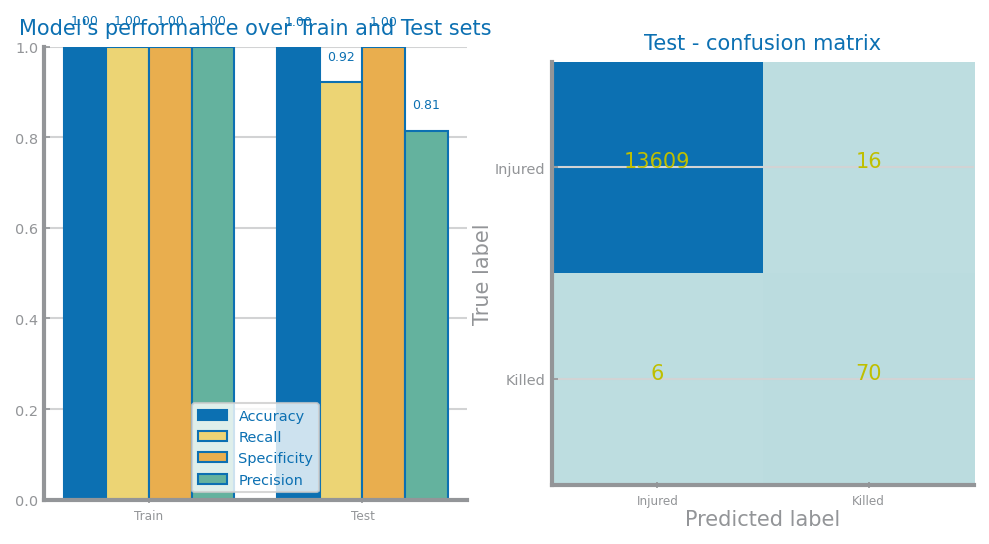

In [6]:
prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig(f'images/{file_tag}_scl_mlp_best.png')
show()

study the overfitting:

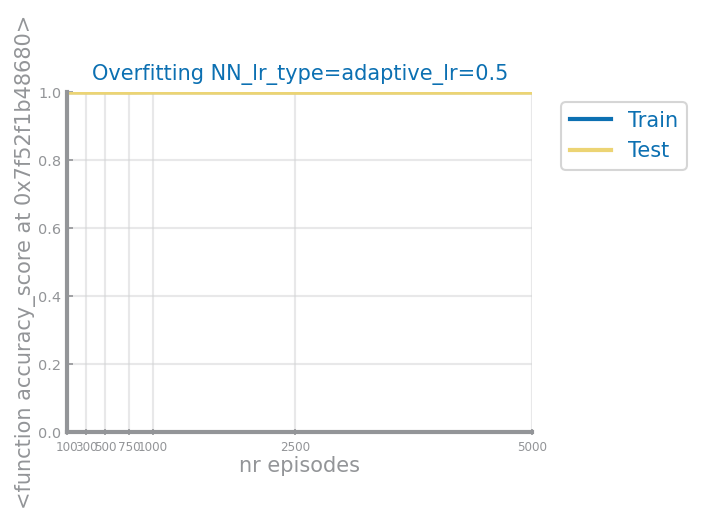

In [10]:
import matplotlib.pyplot as plt

def plot_overfitting_study(xvalues, prd_trn, prd_tst, name, xlabel, ylabel):
    evals = {'Train': prd_trn, 'Test': prd_tst}
    plt.figure()
    multiple_line_chart(xvalues, evals, ax = None, title=f'Overfitting {name}', xlabel=xlabel, ylabel=ylabel, percentage=True)
    plt.savefig('images/overfitting_{name}.png')

lr_type = 'adaptive'
lr = 0.5
eval_metric = metrics.accuracy_score
y_tst_values = []
y_trn_values = []
for n in max_iter:
    mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate=lr_type, learning_rate_init=lr, max_iter=n, verbose=False)
    mlp.fit(trnX, trnY)
    prd_tst_Y = mlp.predict(tstX)
    prd_trn_Y = mlp.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y))
plot_overfitting_study(max_iter, y_trn_values, y_tst_values, name=f'NYC_collisions_scl_mlp_study.png', xlabel='nr episodes', ylabel=str(eval_metric))

## Dummified data without scaling

get dataframes:

In [11]:
train: DataFrame = read_csv('data/train_sets/no_scaling.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv('data/test_sets/no_scaling.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

train models:

<Figure size 600x450 with 0 Axes>

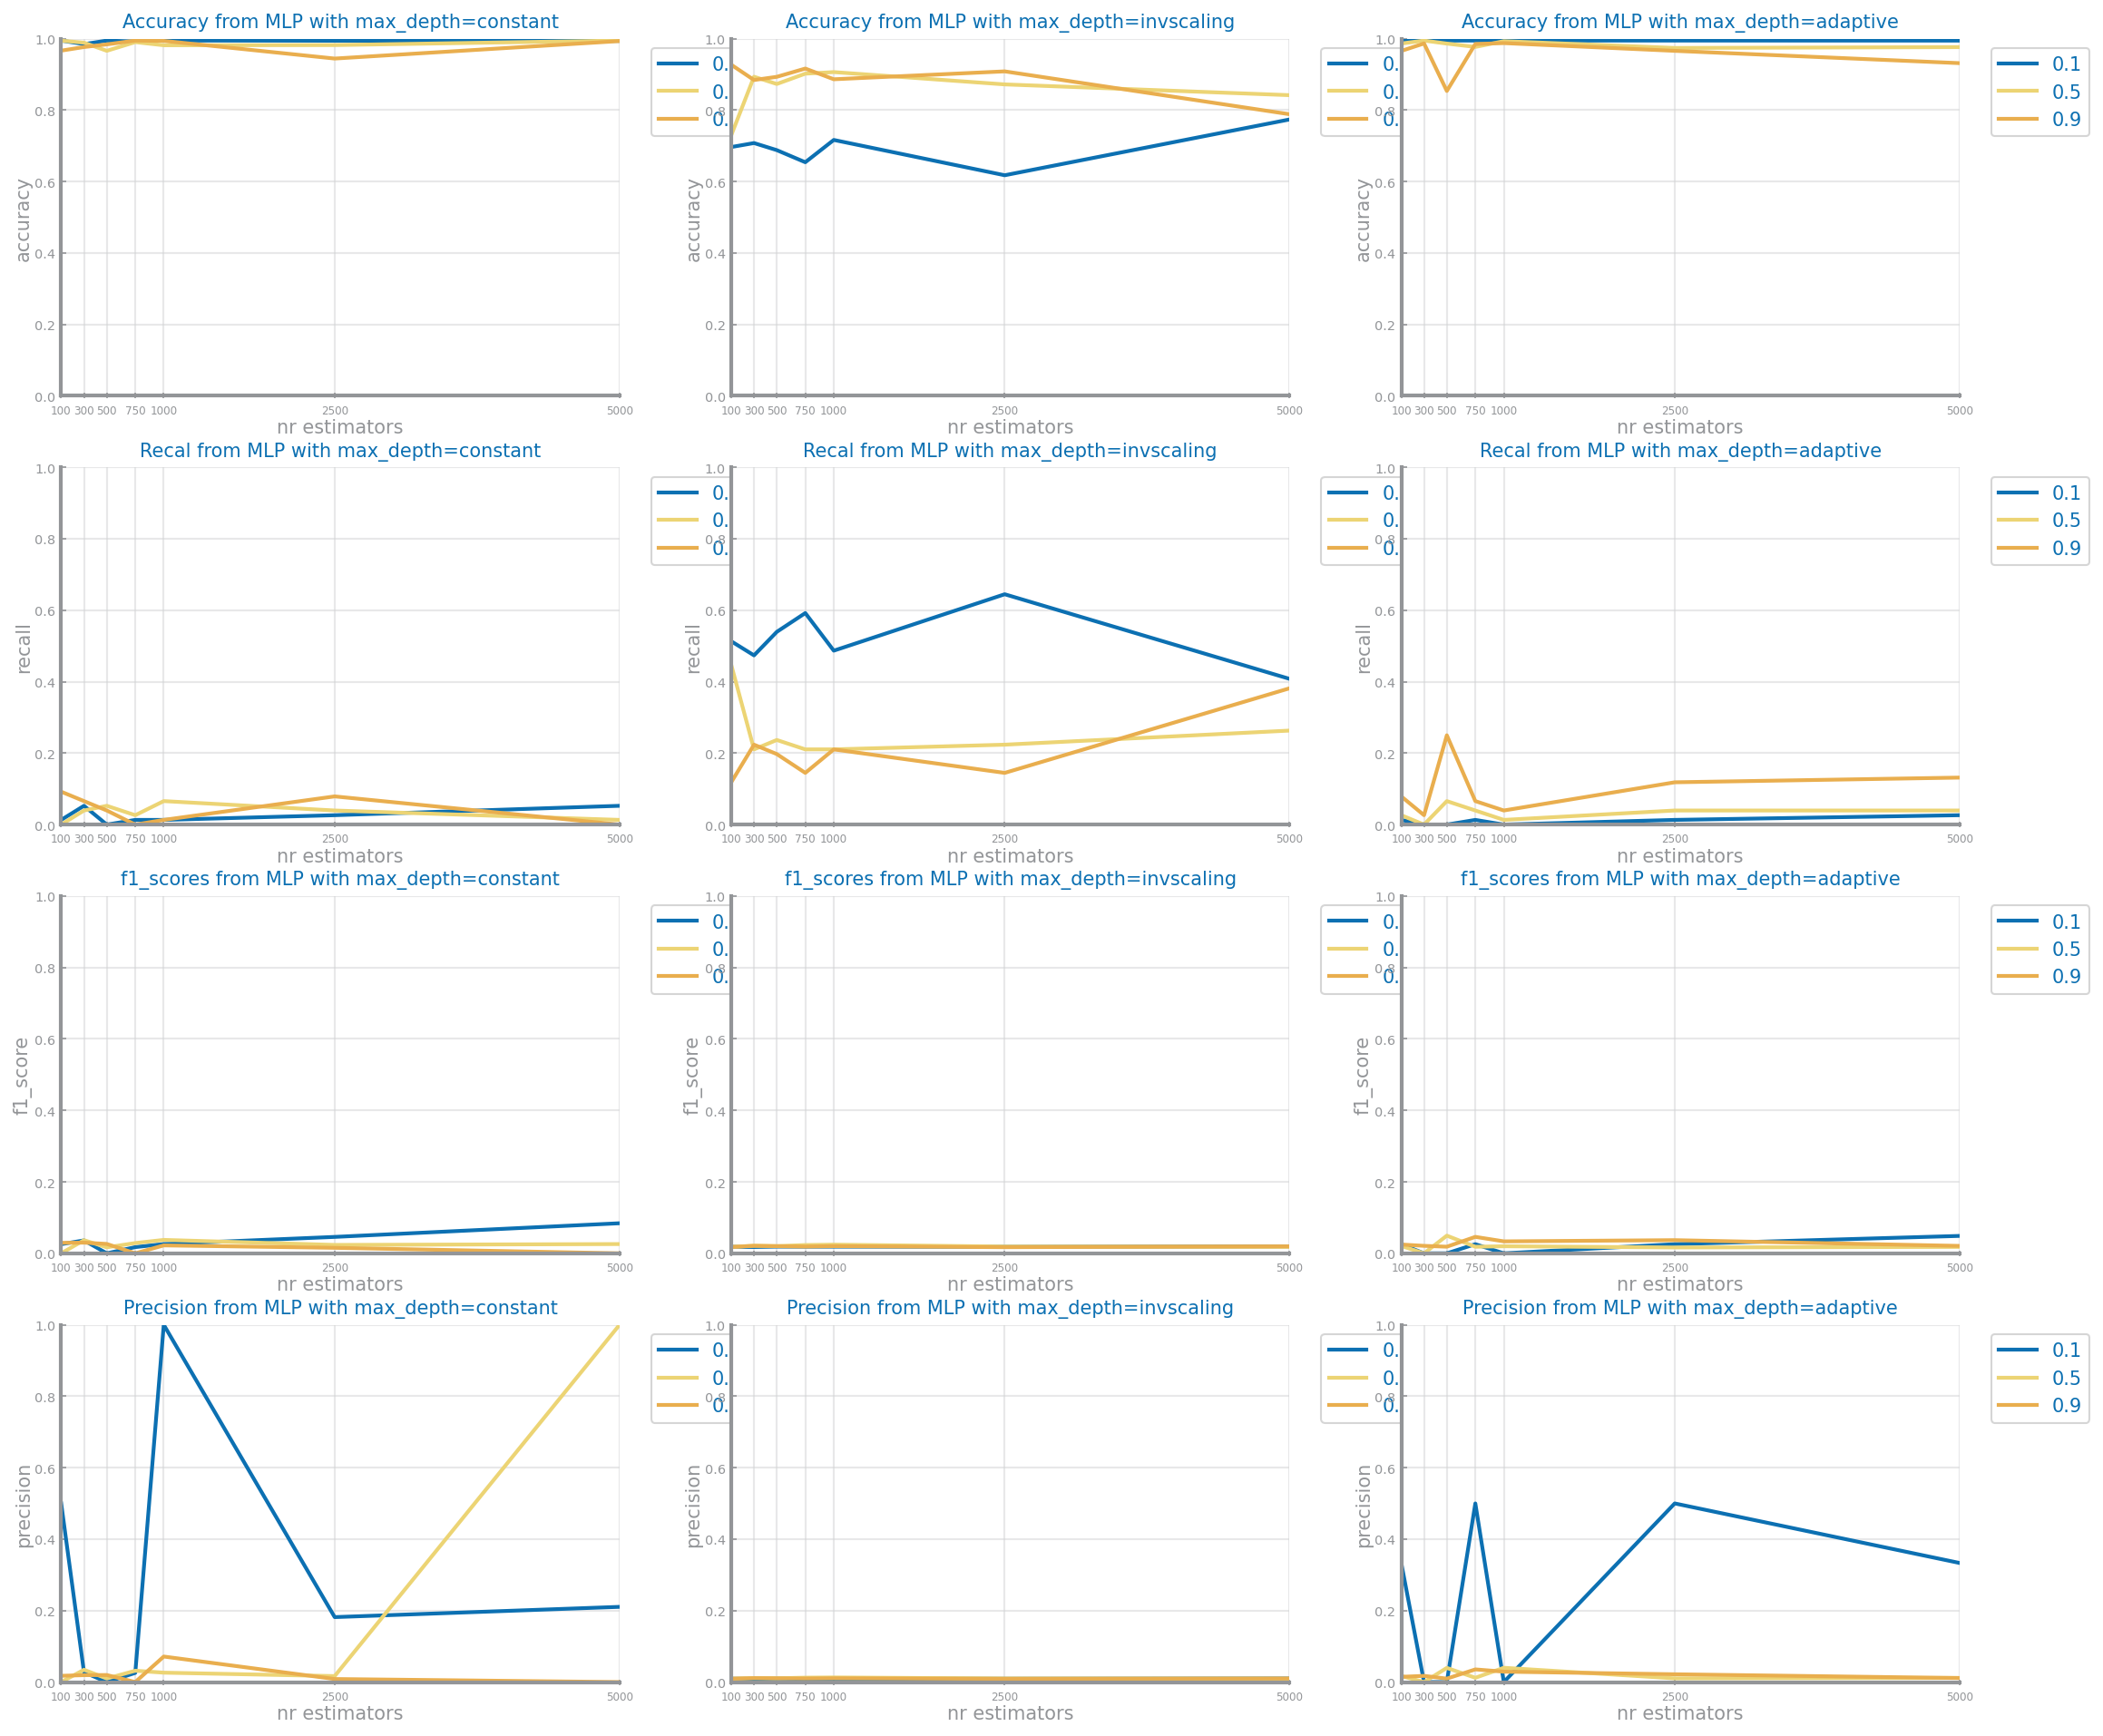

Best results with lr_type=constant, learning rate=0.1 and 1000 max iter, with accuracy=0.994525947011167


In [12]:
lr_type = ['constant', 'invscaling', 'adaptive']
max_iter = [100, 300, 500, 750, 1000, 2500, 5000]
learning_rate = [.1, .5, .9]
best = ('', 0, 0)
last_best = 0
best_model = None

cols = len(lr_type)
figure()
fig, axs = subplots(4, cols, figsize=(cols*HEIGHT*1.5, 4*HEIGHT), squeeze=False)
for k in range(len(lr_type)):
    d = lr_type[k]

    acc_values = {}
    recall_values = {}
    f1_values = {}
    precision_values = {}

    for lr in learning_rate:
        recall = []
        f1_score = []
        accuracy = []
        precision = []
        for n in max_iter:
            mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate=d,
                          learning_rate_init=lr, max_iter=n, verbose=False)
            mlp.fit(trnX, trnY)
            prdY = mlp.predict(tstX)

            accuracy.append(metrics.accuracy_score(tstY, prdY))
            recall.append(metrics.recall_score(tstY, prdY, pos_label='Killed'))
            f1_score.append(metrics.f1_score(tstY, prdY, pos_label="Killed"))
            precision.append(metrics.precision_score(tstY, prdY, pos_label="Killed"))

            if accuracy[-1] > last_best:
                best = (d, lr, n)
                last_best = accuracy[-1]
                best_model = mlp
                
        precision_values[lr] = precision
        acc_values[lr] = accuracy
        recall_values[lr] = recall
        f1_values[lr] = f1_score

    multiple_line_chart(max_iter, acc_values, ax=axs[0, k], title=f'Accuracy from MLP with max_depth={d}',
                           xlabel='nr estimators', ylabel='accuracy', percentage=True)
    multiple_line_chart(max_iter, recall_values, ax=axs[1, k], title=f'Recal from MLP with max_depth={d}',
                           xlabel='nr estimators', ylabel='recall', percentage=True)
    multiple_line_chart(max_iter, f1_values, ax=axs[2, k], title=f'f1_scores from MLP with max_depth={d}',
                           xlabel='nr estimators', ylabel='f1_score', percentage=True)
    multiple_line_chart(max_iter, precision_values, ax=axs[3, k], title=f'Precision from MLP with max_depth={d}',
                           xlabel='nr estimators', ylabel='precision', percentage=True)

savefig(f'images/{file_tag}_mlp_study.png')
show()
print(f'Best results with lr_type={best[0]}, learning rate={best[1]} and {best[2]} max iter, with accuracy={last_best}')

plot study for the best model:

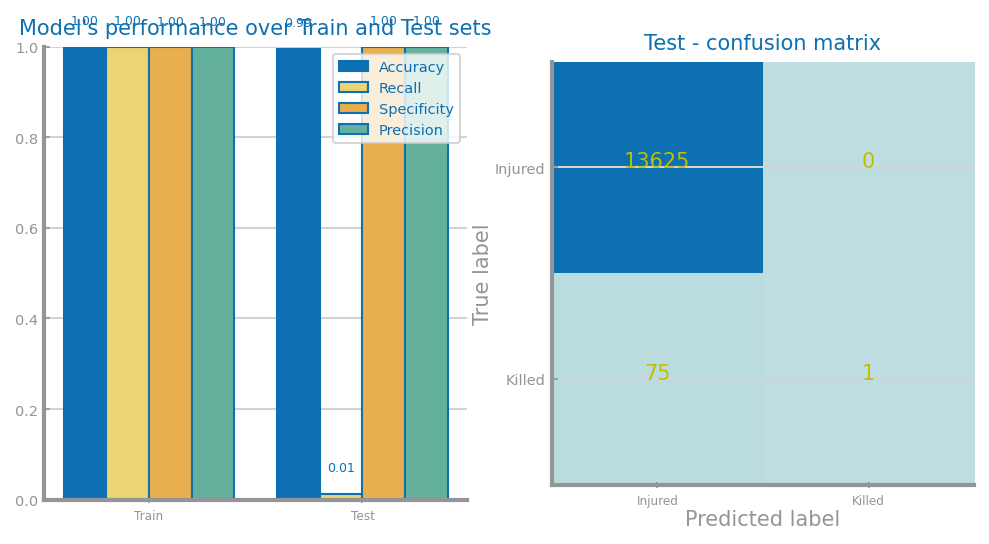

In [13]:
prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig(f'images/{file_tag}_mlp_best.png')
show()

study the overfitting:

In [3]:
lr_type = 'adaptive'
lr = 0.9
eval_metric = metrics.accuracy_score
y_tst_values = []
y_trn_values = []
for n in max_iter:
    mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate=lr_type, learning_rate_init=lr, max_iter=n, verbose=False)
    mlp.fit(trnX, trnY)
    prd_tst_Y = mlp.predict(tstX)
    prd_trn_Y = mlp.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y))
plot_overfitting_study(max_iter, y_trn_values, y_tst_values, name='NYC_collisions_mlp_overfit.png', xlabel='nr episodes', ylabel=str(eval_metric))

NameError: ignored